In [34]:
import numpy

In [35]:
from matplotlib import pyplot

In [36]:
%matplotlib inline

In [37]:
T=100
dt=0.02
N=int(T/dt)+1
t=numpy.linspace(0.0, T, N)

In [38]:
print(t)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   9.99600000e+01
   9.99800000e+01   1.00000000e+02]


In [39]:
ttest=numpy.arange(0.0, 100.02, 0.02)

In [40]:
print(ttest)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   9.99600000e+01
   9.99800000e+01   1.00000000e+02]


In [41]:
#numpy.set_printoptions(threshold=numpy.nan)
t==ttest

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [42]:
print(t)

[  0.00000000e+00   2.00000000e-02   4.00000000e-02 ...,   9.99600000e+01
   9.99800000e+01   1.00000000e+02]


In [43]:
#initial conditions
z0=100 #altitude
b0=10 #upward velocity resulting from gust
zt=100
g=9.81

In [44]:
print(z0, b0)

100 10


u is now a vector

In [45]:
u=numpy.array([z0,b0])

In [46]:
print(u)

[100  10]


In [47]:
z=numpy.zeros(N)

In [48]:
print(z)

[ 0.  0.  0. ...,  0.  0.  0.]


In [49]:
z[0]=z0

In [50]:
print(z)

[ 100.    0.    0. ...,    0.    0.    0.]


**time loop using Euler's** Methods

In [51]:
for n in range(1,N):
    u = u+dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n]=u[0]

In [52]:
print(z)

[ 100.          100.2         100.4        ...,   96.20588732   96.42520884
   96.64467925]


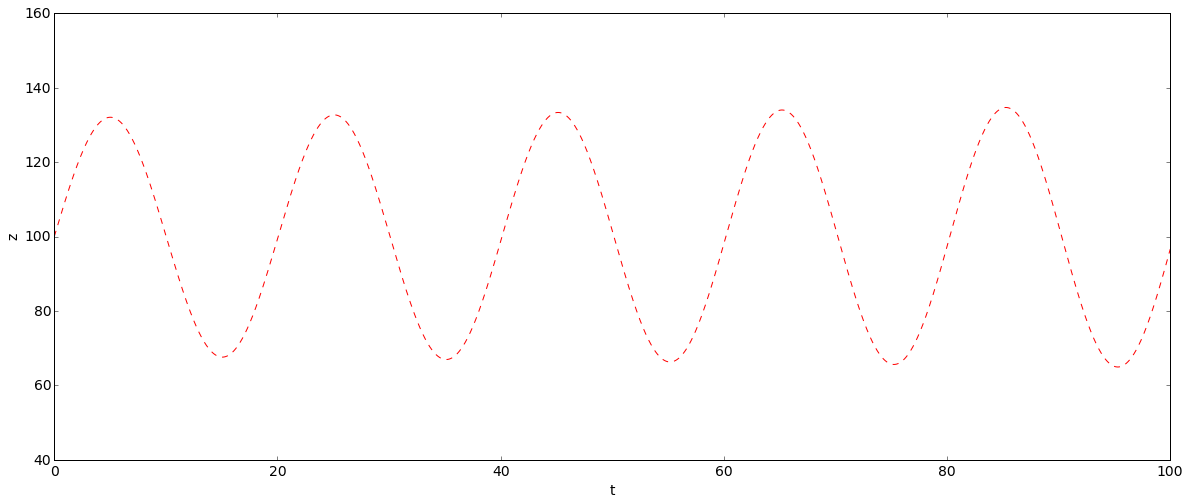

In [53]:
pyplot.figure(figsize=(20,8)) #sets the plot size
pyplot.ylim(40, 160) # y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #sets X-axis label and size
pyplot.ylabel('z', fontsize=14) #set Y-axis label and size
pyplot.plot(t, z, 'r--');

In [54]:
print(b0)

10


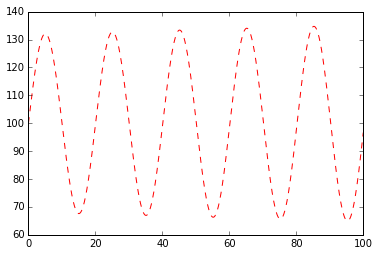

In [55]:
pyplot.plot(t, z, 'r--');

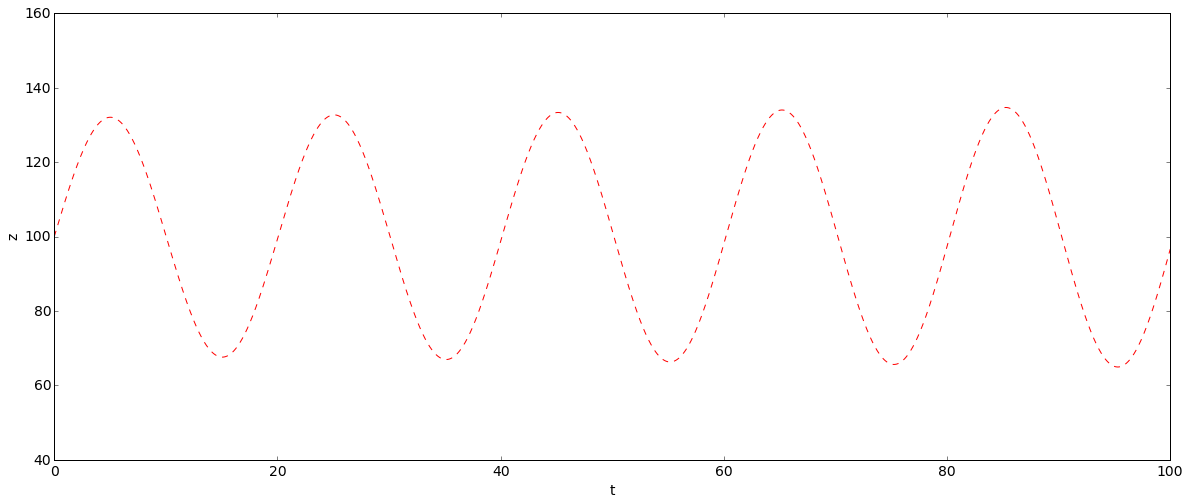

In [56]:
pyplot.figure(figsize=(20,8)) #sets the plot size
pyplot.ylim(40, 160) # y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #sets X-axis label and size
pyplot.ylabel('z', fontsize=14) #set Y-axis label and size
pyplot.plot(t, z, 'r--');

In [57]:
z_exact=b0*(zt/g)**.5*numpy.sin((g/zt)**0.5*t) + (z0-zt)*numpy.cos((g/zt)**.5*t) +zt

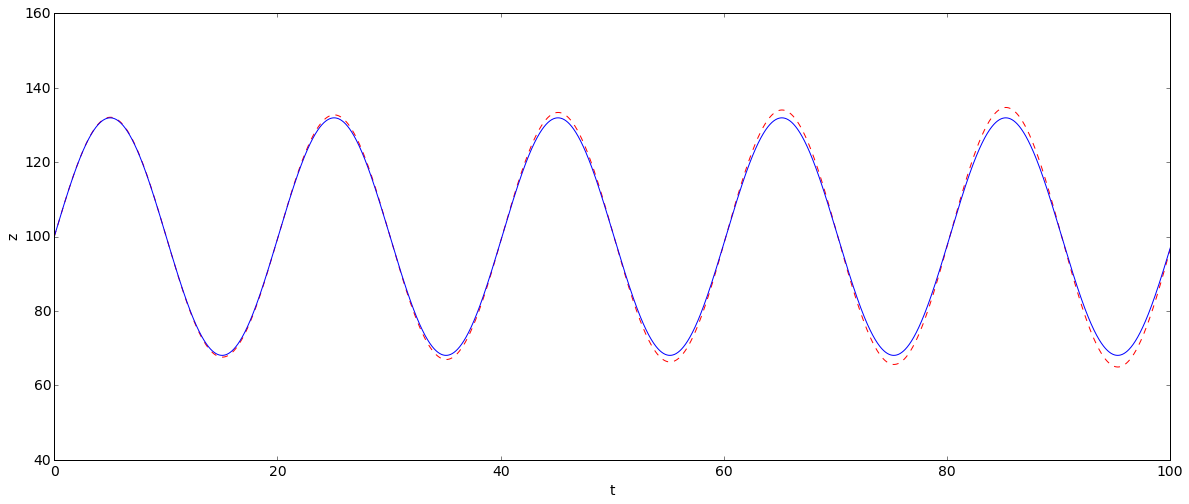

In [58]:
pyplot.figure(figsize=(20,8)) #sets the plot size
pyplot.ylim(40, 160) # y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #sets X-axis label and size
pyplot.ylabel('z', fontsize=14) #set Y-axis label and size
pyplot.plot(t, z, 'r--');
pyplot.plot(t,z_exact);

In [59]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i



In [60]:

def get_error(z, dt):

    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))


In [61]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

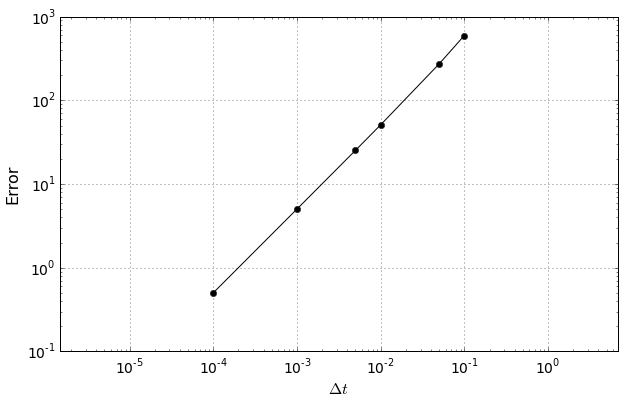

In [62]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

In [63]:
def ChrisEuler(time_step, U_array, gravity, cruise_altitude):
    dt=time_step
    u=U_array
    g=gravity
    zt=cruise_altitude
    z = numpy.zeros(N)
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
    return z

In [64]:
ChrisEuler(dt, u, g, zt)

array([  0.        ,  96.97073058,  96.97172656, ...,  93.9618749 ,
        93.96285785,  93.96384081])

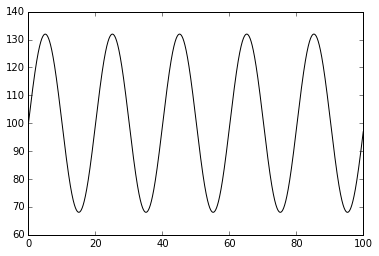

In [65]:
pyplot.plot(t,z, 'k-');

In [66]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method with Chris Function
    ChrisEuler(dt, u, g, zt)
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i


(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

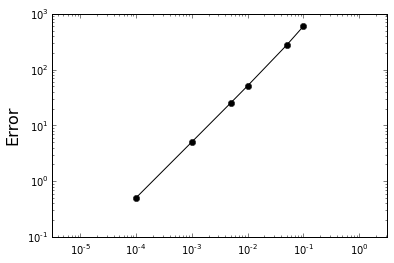

In [67]:
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')  